# Importing Packages and looking into the dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the file as saving to dataframe(df)

In [3]:
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Checking dataframe to see if there are any missing values. There are two missing values

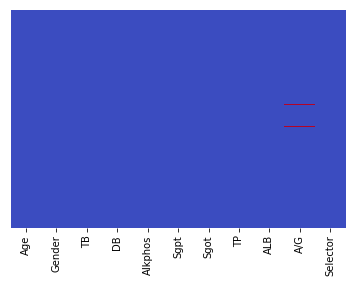

In [5]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [6]:
# Impute missing values by importing the Imputer class from sklearn.preprocessing

In [7]:
from sklearn.preprocessing import Imputer

In [8]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)

In [9]:
imputer = imputer.fit(df.iloc[:,9:10])

In [10]:
df.iloc[:,9:10]= imputer.transform(df.iloc[:,9:10])

In [11]:
# Checking for missing data again

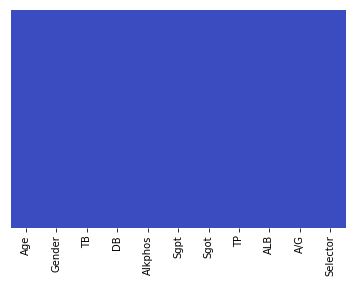

In [12]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [13]:
# Get some info on the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age         583 non-null int64
Gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
Alkphos     583 non-null int64
Sgpt        583 non-null int64
Sgot        583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
A/G         583 non-null float64
Selector    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
df.drop('Selector',axis=1).describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [16]:
# Checking if data is skewed

In [17]:
df.skew()

Age         -0.029385
TB           4.907474
DB           3.212403
Alkphos      3.765106
Sgpt         6.549192
Sgot        10.546177
TP          -0.285672
ALB         -0.043685
A/G          0.995703
Selector     0.947140
dtype: float64

# Data Visualization

In [18]:
# As the heatmap shows there are no missing values. Now let's do some visalization.

In [19]:
#plt.figure(figsize= (6
#df.hist()

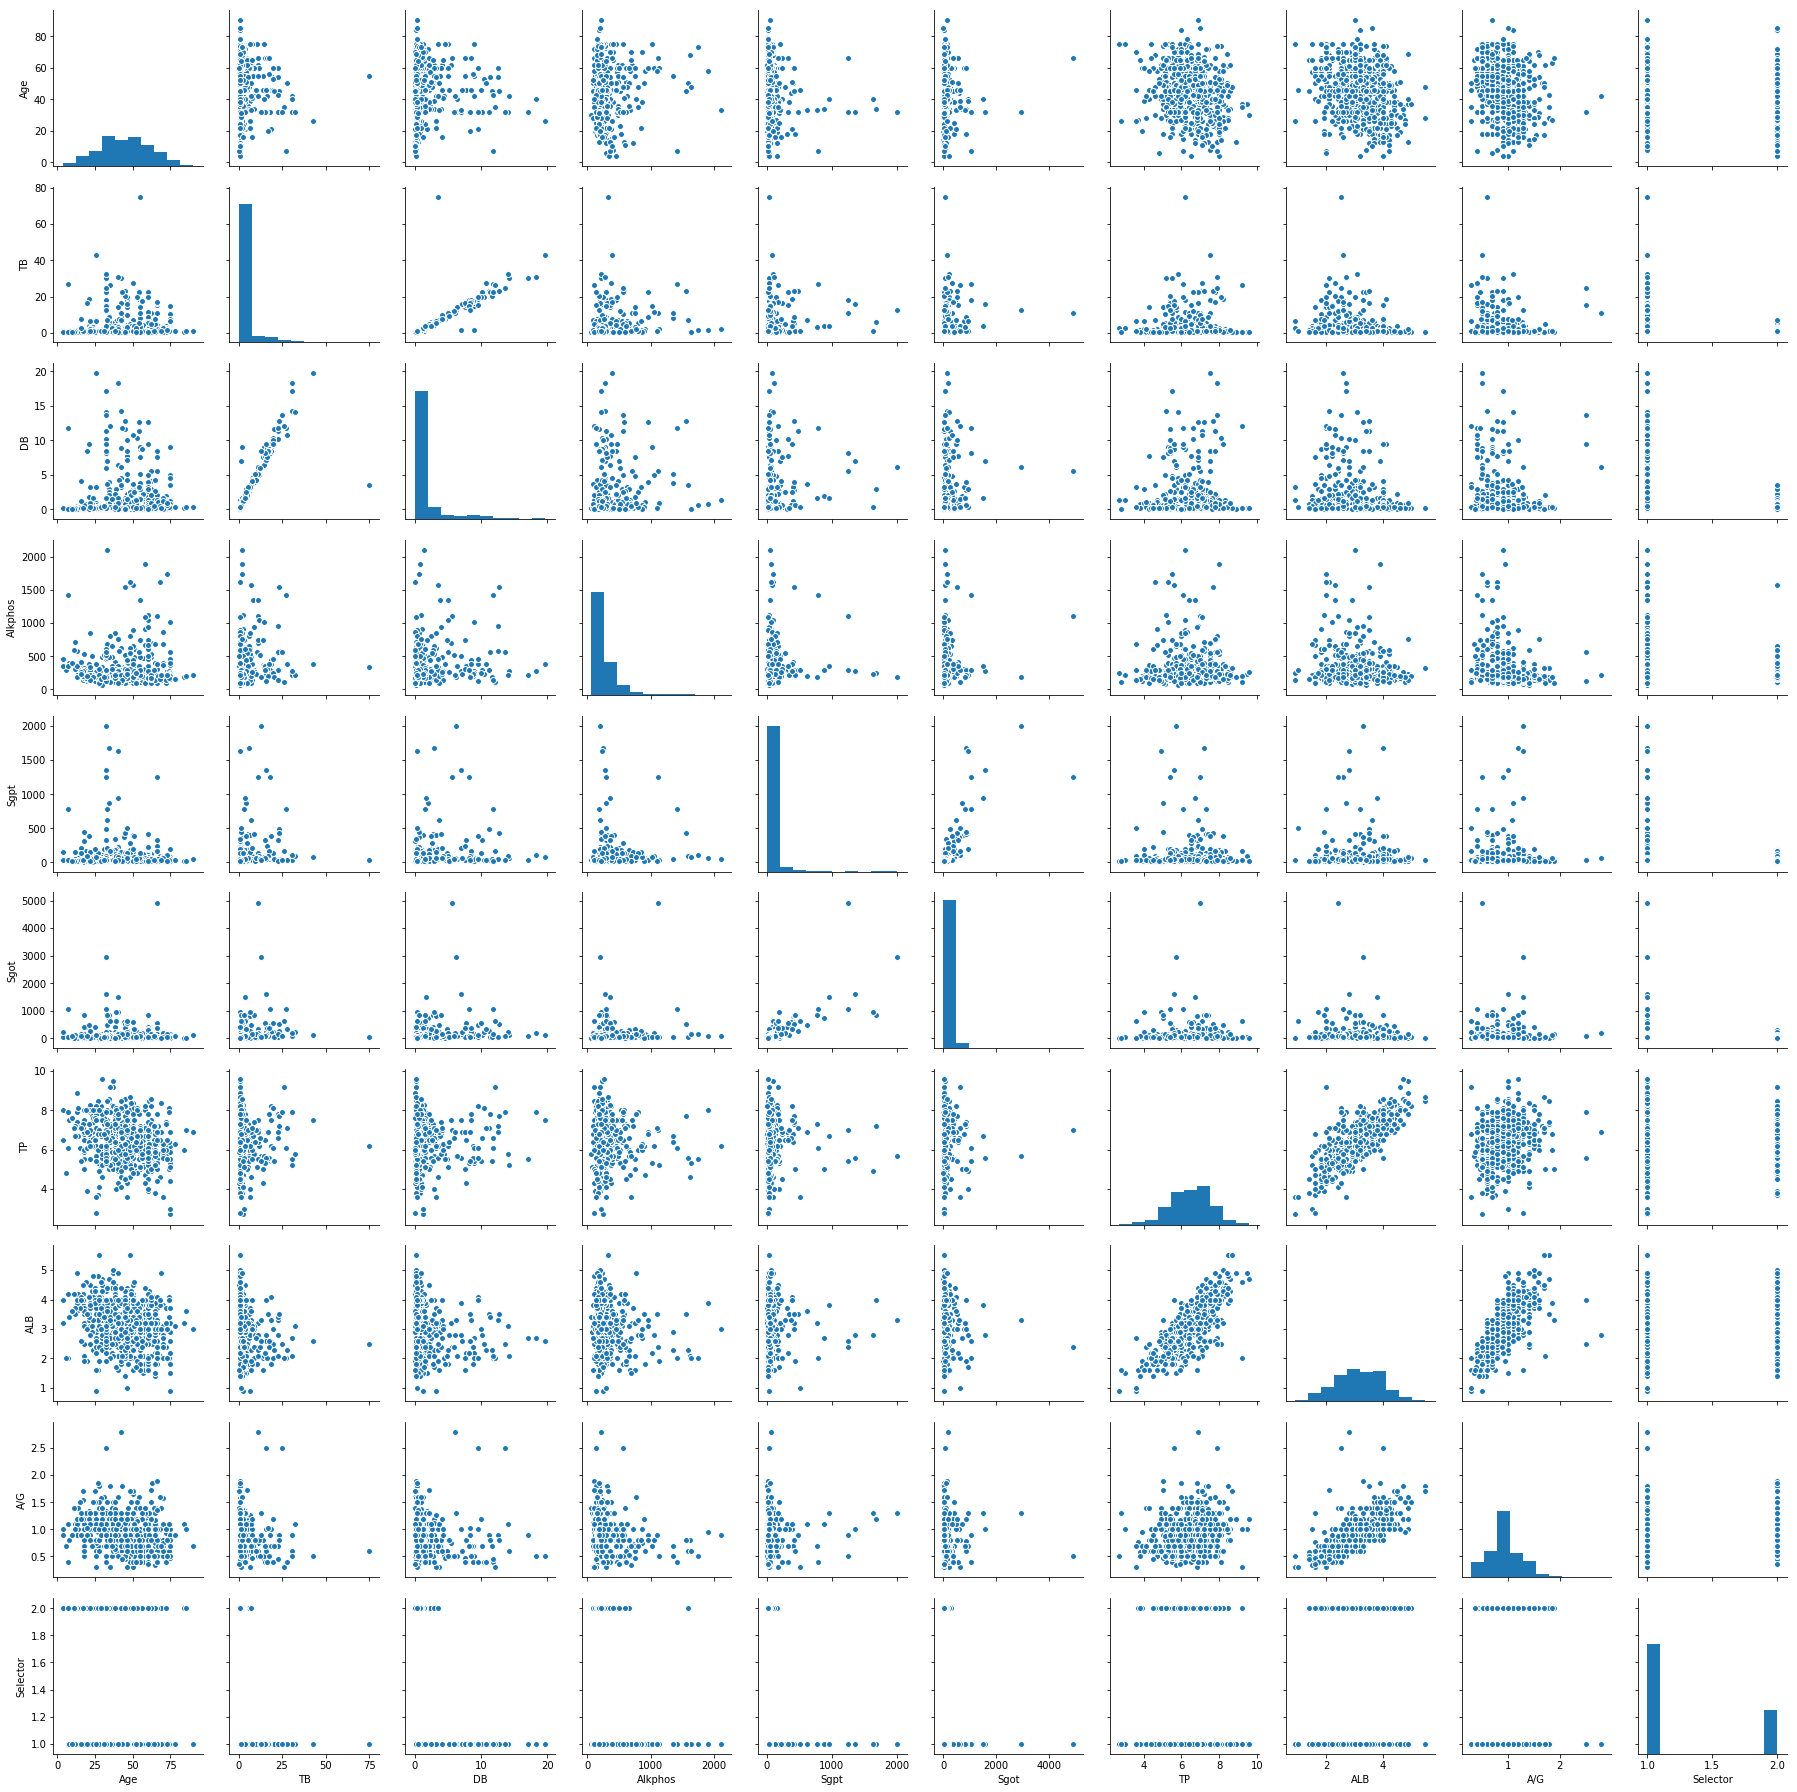

In [20]:
sns.pairplot(df)

In [21]:
# Looks like there may be some linear correlations between some of the features. More data visualizations

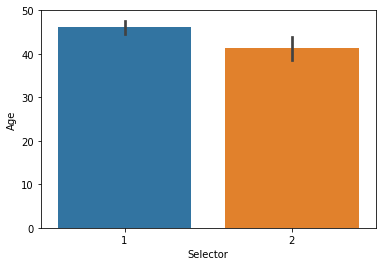

In [22]:
sns.barplot(x='Selector',y='Age',data =df)

In [23]:
# Mean Age is roughly the same for both selctors

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


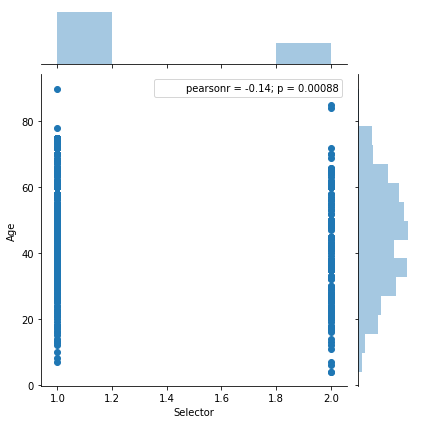

In [24]:
sns.jointplot(x='Selector',y='Age',data =df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


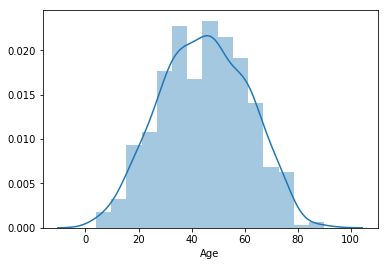

In [25]:
sns.distplot(df['Age'])

In [26]:
# Age looks almost normally distributed

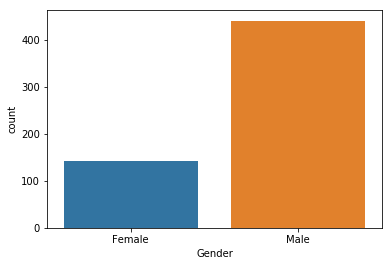

In [27]:
sns.countplot(x='Gender',data=df)

In [28]:
# More Males than Females in the dataset

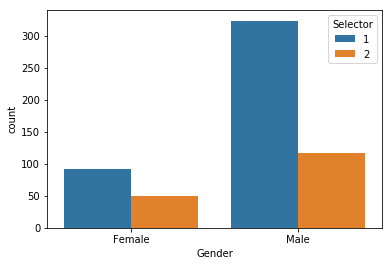

In [29]:
sns.countplot(x='Gender',data=df,hue='Selector')

In [30]:
# The percentage of females falling under category 2 is higher than that of of males when compared to the total of
#their gender.

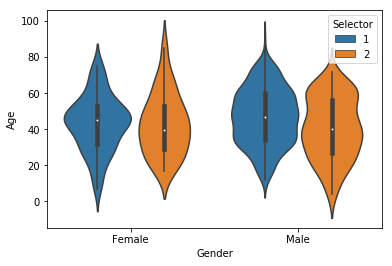

In [31]:
sns.violinplot(x='Gender',y='Age',hue='Selector',data=df)

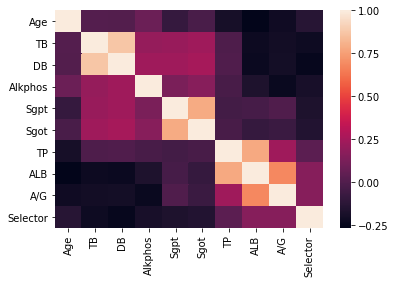

In [32]:
sns.heatmap(df.corr())

In [33]:
# Some of the features are highly correlated

# Preparing data for Machine Learning Algorithms

In [34]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Using pd.get_dummies instead to turn categorical data into inegers

In [35]:
# Encoding gender 

In [36]:
Gender = pd.get_dummies(df.iloc[: ,1], drop_first=True)

In [37]:
df = pd.concat([df,Gender],axis=1)

In [38]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [39]:
df.drop('Gender',axis=1,inplace=True)

In [40]:
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [41]:
#Encoding Selector and Renaming it as Prognosis

In [42]:
Result = pd.get_dummies(df['Selector'],drop_first=True)

In [43]:
df=pd.concat([df,Result],axis=1)

In [44]:
df.head(10)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male,2
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,0
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,1,0
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1,0,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2,1,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1,1,0


In [45]:
df.drop('Selector',axis=1,inplace=True)

In [46]:
# This turned the categories in the Selector column: Category 2 is now category 1 and Category 1 is now category 0

In [47]:
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Male,2
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


In [48]:
#renaming column 2 to Prognosis

In [49]:
df['Prognosis'] = df[2]

In [50]:
df.drop(2,axis=1,inplace=True)

In [51]:
df.head(10)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Male,Prognosis
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,0
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,0,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,1,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1,0


In [52]:
#checking if target variable is imbalanced

In [53]:
df['Prognosis'].value_counts()

0    416
1    167
Name: Prognosis, dtype: int64

# Data is unbalanced - Balancing it by Up-sampling the minority class

In [54]:
from sklearn.utils import resample

In [55]:
# Creating 2 different dataframes df_majority and df_minority

In [56]:
df_majority = df[df['Prognosis']==0]

In [57]:
df_minority = df[df['Prognosis']==1]

In [58]:
# Upsample minority class

In [59]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=416, random_state=123)

In [60]:
# Combine majority class with upsampled minority class

In [61]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [62]:
df_upsampled['Prognosis'].value_counts()

1    416
0    416
Name: Prognosis, dtype: int64

# Spliting the dataset into independent variables X and dependent variable y and into test and train sets

In [63]:
X =df_upsampled.drop('Prognosis', axis=1)

In [64]:
y = df_upsampled['Prognosis']

# Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc_X = StandardScaler()

In [67]:
X = sc_X.fit_transform(X)

# Spliting Data into Test and Train Data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# 9. Deep Neural Networks

In [71]:
import keras

In [72]:
from keras.models import Sequential

In [73]:
from keras.layers import Dense

In [74]:
# Initializing the Network

In [75]:
nn_classifier = Sequential()

In [76]:
# Adding the first input layer and the first hidden layer

In [77]:
nn_classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=10))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [78]:
# Adding second Layer

In [79]:
nn_classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [80]:
# Adding output layer

In [81]:
nn_classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [82]:
# Compiling Neural Network

In [83]:
nn_classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
nn_classifier.fit(X_train,y_train,batch_size=10,epochs=1000)

Epoch 1/1000
582/582 [==============================] - 0s 609us/step - loss: 0.6931 - acc: 0.5137
Epoch 2/1000
582/582 [==============================] - 0s 139us/step - loss: 0.6876 - acc: 0.6821
Epoch 3/1000
582/582 [==============================] - 0s 139us/step - loss: 0.6598 - acc: 0.7045
Epoch 4/1000
582/582 [==============================] - 0s 141us/step - loss: 0.6139 - acc: 0.7096
Epoch 5/1000
582/582 [==============================] - 0s 135us/step - loss: 0.5776 - acc: 0.7182
Epoch 6/1000
582/582 [==============================] - 0s 132us/step - loss: 0.5576 - acc: 0.7268
Epoch 7/1000
582/582 [==============================] - 0s 146us/step - loss: 0.5473 - acc: 0.7388
Epoch 8/1000
582/582 [==============================] - 0s 144us/step - loss: 0.5408 - acc: 0.7423
Epoch 9/1000
582/582 [==============================] - 0s 158us/step - loss: 0.5380 - acc: 0.7337
Epoch 10/1000
582/582 [==============================] - 0s 134us/step - loss: 0.5355 - acc: 0.7302
Epoch 11/

582/582 [==============================] - 0s 151us/step - loss: 0.4923 - acc: 0.7423
Epoch 84/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4922 - acc: 0.7371
Epoch 85/1000
582/582 [==============================] - 0s 223us/step - loss: 0.4909 - acc: 0.7440
Epoch 86/1000
582/582 [==============================] - 0s 255us/step - loss: 0.4906 - acc: 0.7457
Epoch 87/1000
582/582 [==============================] - 0s 230us/step - loss: 0.4898 - acc: 0.7440
Epoch 88/1000
582/582 [==============================] - 0s 199us/step - loss: 0.4898 - acc: 0.7474
Epoch 89/1000
582/582 [==============================] - 0s 235us/step - loss: 0.4888 - acc: 0.7457
Epoch 90/1000
582/582 [==============================] - 0s 219us/step - loss: 0.4898 - acc: 0.7388
Epoch 91/1000
582/582 [==============================] - 0s 224us/step - loss: 0.4902 - acc: 0.7491
Epoch 92/1000
582/582 [==============================] - 0s 224us/step - loss: 0.4881 - acc: 0.7440
Epoch 93/1000


582/582 [==============================] - 0s 175us/step - loss: 0.4669 - acc: 0.7612
Epoch 165/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4659 - acc: 0.7629
Epoch 166/1000
582/582 [==============================] - 0s 195us/step - loss: 0.4666 - acc: 0.7663
Epoch 167/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4654 - acc: 0.7663
Epoch 168/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4646 - acc: 0.7646
Epoch 169/1000
582/582 [==============================] - 0s 190us/step - loss: 0.4645 - acc: 0.7663
Epoch 170/1000
582/582 [==============================] - 0s 185us/step - loss: 0.4645 - acc: 0.7646
Epoch 171/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4647 - acc: 0.7680
Epoch 172/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4643 - acc: 0.7680
Epoch 173/1000
582/582 [==============================] - 0s 199us/step - loss: 0.4651 - acc: 0.7646
Epoch

582/582 [==============================] - 0s 165us/step - loss: 0.4533 - acc: 0.7698
Epoch 246/1000
582/582 [==============================] - 0s 163us/step - loss: 0.4536 - acc: 0.7732
Epoch 247/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4543 - acc: 0.7766
Epoch 248/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4553 - acc: 0.7680
Epoch 249/1000
582/582 [==============================] - 0s 195us/step - loss: 0.4557 - acc: 0.7698
Epoch 250/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4545 - acc: 0.7732
Epoch 251/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4532 - acc: 0.7680
Epoch 252/1000
582/582 [==============================] - 0s 178us/step - loss: 0.4541 - acc: 0.7732
Epoch 253/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4539 - acc: 0.7663
Epoch 254/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4536 - acc: 0.7732
Epoch

582/582 [==============================] - 0s 163us/step - loss: 0.4474 - acc: 0.7801
Epoch 327/1000
582/582 [==============================] - 0s 159us/step - loss: 0.4486 - acc: 0.7818
Epoch 328/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4490 - acc: 0.7852
Epoch 329/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4479 - acc: 0.7835
Epoch 330/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4481 - acc: 0.7766
Epoch 331/1000
582/582 [==============================] - 0s 188us/step - loss: 0.4479 - acc: 0.7766
Epoch 332/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4534 - acc: 0.7680
Epoch 333/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4462 - acc: 0.7801
Epoch 334/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4470 - acc: 0.7852
Epoch 335/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4467 - acc: 0.7801
Epoch

582/582 [==============================] - 0s 156us/step - loss: 0.4455 - acc: 0.7852
Epoch 408/1000
582/582 [==============================] - 0s 165us/step - loss: 0.4446 - acc: 0.7887
Epoch 409/1000
582/582 [==============================] - 0s 190us/step - loss: 0.4434 - acc: 0.7869
Epoch 410/1000
582/582 [==============================] - 0s 159us/step - loss: 0.4447 - acc: 0.7921
Epoch 411/1000
582/582 [==============================] - 0s 187us/step - loss: 0.4425 - acc: 0.7835
Epoch 412/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4440 - acc: 0.7869
Epoch 413/1000
582/582 [==============================] - 0s 163us/step - loss: 0.4431 - acc: 0.7904
Epoch 414/1000
582/582 [==============================] - 0s 187us/step - loss: 0.4456 - acc: 0.7835
Epoch 415/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4428 - acc: 0.7852
Epoch 416/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4436 - acc: 0.7818
Epoch

Epoch 488/1000
582/582 [==============================] - 0s 163us/step - loss: 0.4405 - acc: 0.7869
Epoch 489/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4421 - acc: 0.7869
Epoch 490/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4423 - acc: 0.7921
Epoch 491/1000
582/582 [==============================] - 0s 165us/step - loss: 0.4400 - acc: 0.7904
Epoch 492/1000
582/582 [==============================] - 0s 188us/step - loss: 0.4419 - acc: 0.7904
Epoch 493/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4397 - acc: 0.7852
Epoch 494/1000
582/582 [==============================] - 0s 185us/step - loss: 0.4406 - acc: 0.7852
Epoch 495/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4405 - acc: 0.7904
Epoch 496/1000
582/582 [==============================] - 0s 187us/step - loss: 0.4404 - acc: 0.7887
Epoch 497/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4391 - ac

582/582 [==============================] - 0s 161us/step - loss: 0.4378 - acc: 0.7835
Epoch 570/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4375 - acc: 0.7887
Epoch 571/1000
582/582 [==============================] - 0s 185us/step - loss: 0.4384 - acc: 0.7904
Epoch 572/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4398 - acc: 0.7921
Epoch 573/1000
582/582 [==============================] - 0s 168us/step - loss: 0.4383 - acc: 0.7835
Epoch 574/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4420 - acc: 0.7869
Epoch 575/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4383 - acc: 0.7869
Epoch 576/1000
582/582 [==============================] - 0s 182us/step - loss: 0.4397 - acc: 0.7904
Epoch 577/1000
582/582 [==============================] - 0s 195us/step - loss: 0.4403 - acc: 0.7869
Epoch 578/1000
582/582 [==============================] - 0s 194us/step - loss: 0.4394 - acc: 0.7852
Epoch

Epoch 650/1000
582/582 [==============================] - 0s 168us/step - loss: 0.4367 - acc: 0.7887
Epoch 651/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4383 - acc: 0.7835
Epoch 652/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4364 - acc: 0.7835
Epoch 653/1000
582/582 [==============================] - 0s 192us/step - loss: 0.4349 - acc: 0.7887
Epoch 654/1000
582/582 [==============================] - 0s 202us/step - loss: 0.4366 - acc: 0.7801
Epoch 655/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4351 - acc: 0.7904
Epoch 656/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4353 - acc: 0.7835
Epoch 657/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4348 - acc: 0.7887
Epoch 658/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4355 - acc: 0.7852
Epoch 659/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4341 - ac

582/582 [==============================] - 0s 165us/step - loss: 0.4285 - acc: 0.7921
Epoch 731/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4279 - acc: 0.7921
Epoch 732/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4270 - acc: 0.7801
Epoch 733/1000
582/582 [==============================] - 0s 182us/step - loss: 0.4292 - acc: 0.7904
Epoch 734/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4270 - acc: 0.7869
Epoch 735/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4271 - acc: 0.7904
Epoch 736/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4261 - acc: 0.7818
Epoch 737/1000
582/582 [==============================] - 0s 200us/step - loss: 0.4267 - acc: 0.7852
Epoch 738/1000
582/582 [==============================] - 0s 183us/step - loss: 0.4282 - acc: 0.7852
Epoch 739/1000
582/582 [==============================] - 0s 178us/step - loss: 0.4273 - acc: 0.7835
Epoch

Epoch 811/1000
582/582 [==============================] - 0s 161us/step - loss: 0.4221 - acc: 0.7869
Epoch 812/1000
582/582 [==============================] - 0s 178us/step - loss: 0.4238 - acc: 0.7801
Epoch 813/1000
582/582 [==============================] - 0s 166us/step - loss: 0.4201 - acc: 0.7869
Epoch 814/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4257 - acc: 0.7921
Epoch 815/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4199 - acc: 0.7955
Epoch 816/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4222 - acc: 0.7835
Epoch 817/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4244 - acc: 0.7801
Epoch 818/1000
582/582 [==============================] - 0s 171us/step - loss: 0.4226 - acc: 0.7766
Epoch 819/1000
582/582 [==============================] - 0s 194us/step - loss: 0.4225 - acc: 0.7801
Epoch 820/1000
582/582 [==============================] - 0s 182us/step - loss: 0.4224 - ac

582/582 [==============================] - 0s 158us/step - loss: 0.4155 - acc: 0.7835
Epoch 893/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4155 - acc: 0.7818
Epoch 894/1000
582/582 [==============================] - 0s 197us/step - loss: 0.4165 - acc: 0.7955
Epoch 895/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4207 - acc: 0.7818
Epoch 896/1000
582/582 [==============================] - 0s 192us/step - loss: 0.4174 - acc: 0.7784
Epoch 897/1000
582/582 [==============================] - 0s 177us/step - loss: 0.4156 - acc: 0.7938
Epoch 898/1000
582/582 [==============================] - 0s 180us/step - loss: 0.4198 - acc: 0.7784
Epoch 899/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4154 - acc: 0.7869
Epoch 900/1000
582/582 [==============================] - 0s 192us/step - loss: 0.4164 - acc: 0.7818
Epoch 901/1000
582/582 [==============================] - 0s 192us/step - loss: 0.4205 - acc: 0.7869
Epoch

582/582 [==============================] - 0s 161us/step - loss: 0.4135 - acc: 0.7784
Epoch 974/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4140 - acc: 0.7869
Epoch 975/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4112 - acc: 0.7784
Epoch 976/1000
582/582 [==============================] - 0s 175us/step - loss: 0.4127 - acc: 0.7852
Epoch 977/1000
582/582 [==============================] - 0s 173us/step - loss: 0.4112 - acc: 0.7784
Epoch 978/1000
582/582 [==============================] - 0s 165us/step - loss: 0.4119 - acc: 0.7784
Epoch 979/1000
582/582 [==============================] - 0s 170us/step - loss: 0.4106 - acc: 0.7835
Epoch 980/1000
582/582 [==============================] - 0s 190us/step - loss: 0.4109 - acc: 0.7835
Epoch 981/1000
582/582 [==============================] - 0s 190us/step - loss: 0.4100 - acc: 0.7852
Epoch 982/1000
582/582 [==============================] - 0s 190us/step - loss: 0.4120 - acc: 0.7887
Epoch

In [84]:
# Neural Network gives us an 80-81% accuracy